In [234]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

In [235]:
%matplotlib inline


In [255]:
#All speed units will be in meters/sec

class Car:
    def __init__(self, car_id, size = 5, speed = 30, location = 0):
        self.car_id = car_id
        self.size = size
        self.speed = speed
        self.location = location
            
        
    def move(self):
        self.location += self.speed 
        if self.location > 1000:
            self.location = abs(self.location % 1000)
        return self.location
    
    def check_loc(self):
        return("I'm car {} and I'm at {}".format(self.car_id, self.location))
    
    


In [270]:
class Road:
    def __init__(self):
        self.cars = self.make_cars()
        self.road_map = np.array([0 for _ in range(1050)])
    
    def make_cars(self, num = 30):
        all_cars = []
        for x in range(num):
            all_cars.append(Car(car_id = x))
        return all_cars
    
    def place_cars_init(self):
        placement = 0
        for car in self.cars:
            car.location = placement
            placement += 20
    
    
    def update_road_map(self):
        self.road_map = np.array([0 for _ in range(1050)])
        for car in self.cars:
            for x in range(5):
                self.road_map[car.location+x] = 1
    
    def change_car_speed(self):
        for car in self.cars:
            space = []
            for x in self.road_map[car.location:car.location+car.speed]:
                space.append(x)
            if car.car_id == 29:
                car.speed = car.speed
            if random.random() <= .10:
                car.speed -= 2
            elif sum(space) == 0:
                car.speed += 2
            elif sum(space) > 5:
                car.speed = 0
    
    
    def drive(self):
        return [car.move() for car in self.cars]
    
    
    def check_cars(self):
        return [car.check_loc() for car in self.cars]
    
    
    def reset(self):
        self.road_map = [0 for _ in range(1050)]
        self.place_cars_init()
        self.update_road_map()

        

In [271]:
class Sim:
    def __init__(self):
        self.ticks = 0
        self.road = Road()

    
    
    def tick(self):
        road_data_sec = np.array(self.road.road_map)
        stats = {'location': self.road.check_cars()[25:]}
        self.road.change_car_speed()
        self.road.drive()
        self.road.update_road_map()
        print(stats)
        return road_data_sec

        
    def reset(self):
        return self.ticks == 0
    
    
    def run(self, num_ticks = 100):
        all_data = []
        self.road.place_cars_init()
        for tick in range(num_ticks):
            all_data.append(self.tick())
            self.ticks += 1
            
        return np.array(all_data)
        

In [272]:
sim = Sim()
trial_data = sim.run()


{'location': ["I'm car 25 and I'm at 500", "I'm car 26 and I'm at 520", "I'm car 27 and I'm at 540", "I'm car 28 and I'm at 560", "I'm car 29 and I'm at 580"]}
{'location': ["I'm car 25 and I'm at 532", "I'm car 26 and I'm at 552", "I'm car 27 and I'm at 572", "I'm car 28 and I'm at 592", "I'm car 29 and I'm at 612"]}
{'location': ["I'm car 25 and I'm at 532", "I'm car 26 and I'm at 552", "I'm car 27 and I'm at 572", "I'm car 28 and I'm at 622", "I'm car 29 and I'm at 644"]}
{'location': ["I'm car 25 and I'm at 534", "I'm car 26 and I'm at 554", "I'm car 27 and I'm at 574", "I'm car 28 and I'm at 622", "I'm car 29 and I'm at 676"]}
{'location': ["I'm car 25 and I'm at 534", "I'm car 26 and I'm at 556", "I'm car 27 and I'm at 576", "I'm car 28 and I'm at 624", "I'm car 29 and I'm at 708"]}
{'location': ["I'm car 25 and I'm at 536", "I'm car 26 and I'm at 558", "I'm car 27 and I'm at 578", "I'm car 28 and I'm at 626", "I'm car 29 and I'm at 740"]}
{'location': ["I'm car 25 and I'm at 536

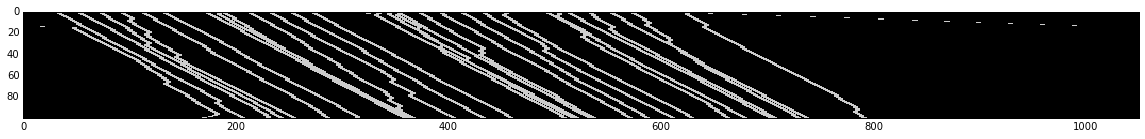

In [273]:
img_data = trial_data.astype('float32')
#print(img_data)

plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(img_data, cmap='spectral', interpolation='nearest')